In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/open-shopee-code-league-marketing-analytics/users.csv
/kaggle/input/open-shopee-code-league-marketing-analytics/test.csv
/kaggle/input/open-shopee-code-league-marketing-analytics/sample_submission_0_1.csv
/kaggle/input/open-shopee-code-league-marketing-analytics/train.csv


# Import data

In [2]:
train = pd.read_csv('../input/open-shopee-code-league-marketing-analytics/train.csv')
test = pd.read_csv('../input/open-shopee-code-league-marketing-analytics/test.csv')
users = pd.read_csv('../input/open-shopee-code-league-marketing-analytics/users.csv')
samp_sub = pd.read_csv('../input/open-shopee-code-league-marketing-analytics/sample_submission_0_1.csv')

print('train:', train.shape)
print('test:', test.shape)
print('users:', users.shape)
print('sample submission:', samp_sub.shape)

train: (73539, 18)
test: (55970, 17)
users: (127886, 6)
sample submission: (55970, 2)


# EDA

In [3]:
train

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id
0,4,2019-07-16 00:00:00+08:00,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0
1,4,2019-07-16 00:00:00+08:00,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2
3,1,2019-07-16 00:00:00+08:00,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534
73535,2,2019-09-02 00:00:00+08:00,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0,0,0,0,0,0,0,0,73536
73537,2,2019-09-02 00:00:00+08:00,127807,38,5,34,Never checkout,2,4,4,0,0,0,0,0,0,1,73537


In [4]:
test

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id
0,6,2019-09-03 00:00:00+08:00,0,35,27,2,13,2,3,4,10,34,134,0,6,18,0
1,6,2019-09-03 00:00:00+08:00,130,35,7,5,383,1,1,1,5,5,5,0,0,0,1
2,5,2019-09-03 00:00:00+08:00,150,25,34,1,3,0,0,0,13,19,38,2,2,2,2
3,1,2019-09-03 00:00:00+08:00,181,36,63,5,5,0,0,0,43,110,173,2,5,5,3
4,5,2019-09-03 00:00:00+08:00,192,23,6,5,54,0,0,0,4,12,39,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,6,2019-09-29 00:00:00+08:00,127348,53,Never open,4,8,0,0,0,0,0,0,0,0,0,55965
55966,6,2019-09-29 00:00:00+08:00,127396,53,59,802,1207,0,0,1,0,0,0,0,0,0,55966
55967,6,2019-09-29 00:00:00+08:00,127574,43,Never open,7,Never checkout,0,0,0,0,0,0,0,0,0,55967
55968,6,2019-09-29 00:00:00+08:00,127887,43,5,5,6,2,5,14,0,0,0,0,0,0,55968


In [5]:
users

,user_id,attr_1,attr_2,attr_3,age,domain
0,0,NaN,1.0,0.0,NaN,@gmail.com
1,1,1.0,1.0,2.0,50.0,@gmail.com
2,2,NaN,1.0,0.0,NaN,other
3,3,NaN,1.0,0.0,NaN,@gmail.com
4,4,1.0,1.0,2.0,33.0,@gmail.com
...,...,...,...,...,...,...
127881,127921,NaN,1.0,0.0,NaN,@yahoo.com
127882,127922,1.0,1.0,0.0,20.0,@gmail.com
127883,127923,NaN,1.0,0.0,NaN,@gmail.com
127884,127924,NaN,0.0,0.0,NaN,@gmail.com


In [6]:
samp_sub

,row_id,open_flag
0,0,1
1,1,1
2,2,1
3,3,1
4,4,1
...,...,...
55965,55965,0
55966,55966,0
55967,55967,0
55968,55968,0


Checking distribution

In [7]:
train['open_flag'].value_counts()

0    62083
1    11456
Name: open_flag, dtype: int64

**Merge users df to train df and test df**

In [8]:
train = pd.merge(train, users, on = 'user_id', how = 'left')
test = pd.merge(test, users, on = 'user_id', how = 'left')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73539 entries, 0 to 73538
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country_code                 73539 non-null  int64  
 1   grass_date                   73539 non-null  object 
 2   user_id                      73539 non-null  int64  
 3   subject_line_length          73539 non-null  int64  
 4   last_open_day                73539 non-null  object 
 5   last_login_day               73539 non-null  object 
 6   last_checkout_day            73539 non-null  object 
 7   open_count_last_10_days      73539 non-null  int64  
 8   open_count_last_30_days      73539 non-null  int64  
 9   open_count_last_60_days      73539 non-null  int64  
 10  login_count_last_10_days     73539 non-null  int64  
 11  login_count_last_30_days     73539 non-null  int64  
 12  login_count_last_60_days     73539 non-null  int64  
 13  checkout_count_l

Since columns **'country_code', 'attr_1/2/3', 'day_of_week'** are categorical, 

let's change their type to string for convenience in later analysis

In [10]:
# change type of categorical columns to str
train['country_code'] = train['country_code'].astype(str)
train['attr_1'] = train['attr_1'].astype(str)
train['attr_2'] = train['attr_2'].astype(str)
train['attr_3'] = train['attr_3'].astype(str)

test['country_code'] = test['country_code'].astype(str)
test['attr_1'] = test['attr_1'].astype(str)
test['attr_2'] = test['attr_2'].astype(str)
test['attr_3'] = test['attr_3'].astype(str)

Also, since **'grass_date'** column consists of dates, let's change its type to **datetime**

In [11]:
import datetime as dt

train['grass_date'] = pd.to_datetime(train['grass_date'])
test['grass_date'] = pd.to_datetime(test['grass_date'])

**Compare visualizations of open_flag == 0 df and open_flag == 1 to understand the patterns**

In [12]:
train_flag0 = train[train['open_flag'] == 0]
train_flag1 = train[train['open_flag'] == 1]

Country Code

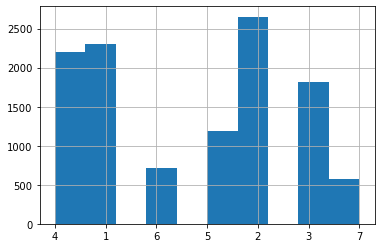

In [13]:
train_flag1['country_code'].hist()

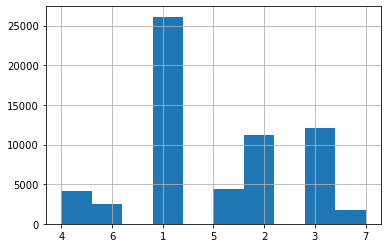

In [14]:
train_flag0['country_code'].hist()

Grass Date

In [15]:
print(train['grass_date'].min(), train['grass_date'].max())
print(test['grass_date'].min(), test['grass_date'].max())

2019-07-16 00:00:00+08:00 2019-09-02 00:00:00+08:00
2019-09-03 00:00:00+08:00 2019-09-29 00:00:00+08:00


Train and test **differ** in the range of date. 

Thus, we could just extract the **day of week** from the 'grass_date' column, 

make a **new column** 'day of week', then drop the 'grass_date' column from our features later.

**New features: 'day_of_week', 'day_of_month'**

In [16]:
# add new column 'day_of_week'
train['day_of_week'] = train['grass_date'].dt.day_name()
test['day_of_week'] = test['grass_date'].dt.day_name()

train['day_of_month'] = train['grass_date'].dt.day
test['day_of_month'] = test['grass_date'].dt.day

In [17]:
train['day_of_week'].value_counts()

Monday       14499
Tuesday      13595
Thursday     11339
Friday       10356
Sunday        9854
Wednesday     8357
Saturday      5539
Name: day_of_week, dtype: int64

Subject Line Length

In [18]:
print(train['subject_line_length'].min(), test['subject_line_length'].max())

10 79


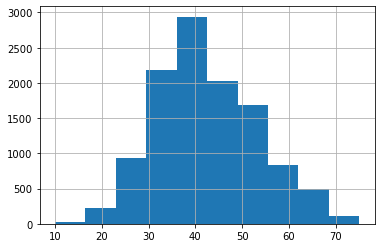

In [19]:
train_flag1['subject_line_length'].hist()

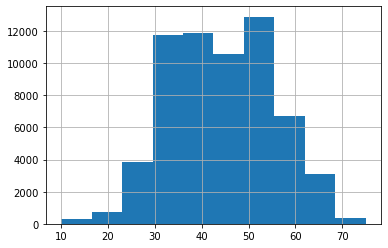

In [20]:
train_flag0['subject_line_length'].hist()

Last Open Day

In [21]:
last_open_day_train = train[train['last_open_day'] != 'Never open'].last_open_day.astype(int)
last_open_day_test = test[test['last_open_day'] != 'Never open'].last_open_day.astype(int)
print(last_open_day_train.min(), last_open_day_train.max())
print(last_open_day_test.min(), last_open_day_test.max())

1 808
1 812


In [22]:
train[(train['last_open_day'] == 'Never open') & (train['open_flag'] == 1)]

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age,domain,day_of_week,day_of_month
938,3,2019-07-16 00:00:00+08:00,51795,33,Never open,6,10,0,0,0,...,2,1,938,1.0,1.0,2.0,30.0,@gmail.com,Tuesday,16
1132,2,2019-07-16 00:00:00+08:00,62947,36,Never open,15,15,1,1,1,...,0,1,1132,nan,1.0,0.0,NaN,@yahoo.com,Tuesday,16
1292,1,2019-07-16 00:00:00+08:00,70161,58,Never open,353,Never checkout,0,0,0,...,0,1,1292,nan,1.0,0.0,NaN,@gmail.com,Tuesday,16
1364,2,2019-07-16 00:00:00+08:00,73241,43,Never open,224,278,0,0,0,...,0,1,1364,nan,1.0,0.0,NaN,@gmail.com,Tuesday,16
1487,2,2019-07-16 00:00:00+08:00,78561,48,Never open,1,6,0,0,0,...,8,1,1487,1.0,1.0,2.0,30.0,@gmail.com,Tuesday,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73228,1,2019-09-02 00:00:00+08:00,120340,33,Never open,27,Never checkout,2,2,2,...,0,1,73228,nan,1.0,0.0,NaN,@gmail.com,Monday,2
73280,2,2019-09-02 00:00:00+08:00,121064,38,Never open,26,Never checkout,0,0,0,...,0,1,73280,nan,1.0,0.0,NaN,@gmail.com,Monday,2
73370,2,2019-09-02 00:00:00+08:00,122243,38,Never open,1,14,0,0,0,...,13,1,73370,1.0,1.0,2.0,19.0,@gmail.com,Monday,2
73448,6,2019-09-02 00:00:00+08:00,123232,39,Never open,1,10,0,0,0,...,4,1,73448,1.0,1.0,2.0,23.0,@gmail.com,Monday,2


In [23]:
train_temp1 = train[(train['last_open_day'] != 'Never open') & (train['open_flag'] == 1)]
train_temp0 = train[(train['last_open_day'] != 'Never open') & (train['open_flag'] == 0)]
train_temp1['last_open_day'] = train_temp1['last_open_day'].astype(int)
train_temp0['last_open_day'] = train_temp0['last_open_day'].astype(int)

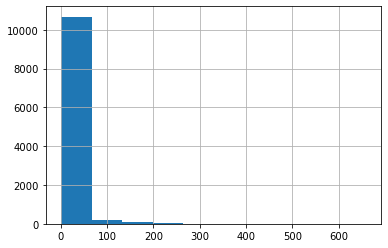

In [24]:
train_temp1['last_open_day'].hist()

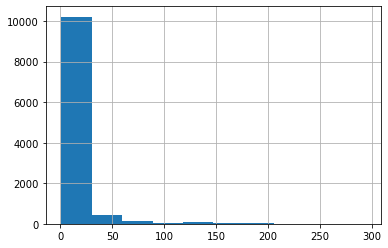

In [25]:
train_temp1 = train_temp1[(train_temp1['last_open_day'] < 300)]
train_temp1['last_open_day'].hist()

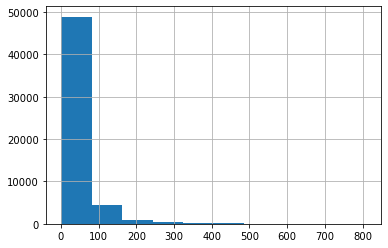

In [26]:
train_temp0['last_open_day'].hist()

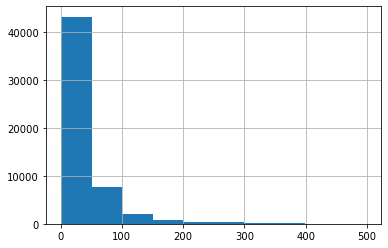

In [27]:
train_temp0[(train_temp0['last_open_day'] < 500)]['last_open_day'].hist()

In [28]:
test[(test['last_open_day'] == 'Never open')]

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,checkout_count_last_30_days,checkout_count_last_60_days,row_id,attr_1,attr_2,attr_3,age,domain,day_of_week,day_of_month
15,5,2019-09-03 00:00:00+08:00,571,25,Never open,6,13,0,0,0,...,2,11,15,1.0,1.0,2.0,32.0,@yahoo.com,Tuesday,3
65,5,2019-09-03 00:00:00+08:00,2034,25,Never open,5,33,0,0,0,...,0,2,65,1.0,1.0,2.0,49.0,@yahoo.com,Tuesday,3
177,5,2019-09-03 00:00:00+08:00,4831,25,Never open,24,28,0,0,0,...,3,5,177,1.0,1.0,1.0,33.0,@gmail.com,Tuesday,3
222,5,2019-09-03 00:00:00+08:00,5758,25,Never open,67,73,0,0,0,...,0,0,222,1.0,1.0,2.0,32.0,@yahoo.com,Tuesday,3
230,5,2019-09-03 00:00:00+08:00,5923,25,Never open,17,165,0,0,0,...,0,0,230,1.0,1.0,1.0,29.0,@yahoo.com,Tuesday,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55954,6,2019-09-29 00:00:00+08:00,126527,41,Never open,Never login,Never checkout,1,1,1,...,0,0,55954,nan,nan,0.0,NaN,other,Sunday,29
55957,6,2019-09-29 00:00:00+08:00,126911,41,Never open,Never login,Never checkout,0,0,0,...,0,0,55957,nan,nan,0.0,NaN,@qq.com,Sunday,29
55961,6,2019-09-29 00:00:00+08:00,127278,43,Never open,27,Never checkout,0,0,0,...,0,0,55961,nan,1.0,0.0,NaN,@gmail.com,Sunday,29
55965,6,2019-09-29 00:00:00+08:00,127348,53,Never open,4,8,0,0,0,...,0,0,55965,nan,1.0,0.0,NaN,@gmail.com,Sunday,29


Last Login Day

In [29]:
last_login_day_train = train[train['last_login_day'] != 'Never login'].last_login_day.astype(int)
last_login_day_test = test[test['last_login_day'] != 'Never login'].last_login_day.astype(int)
print(last_login_day_train.min(), last_login_day_train.max())
print(last_login_day_test.min(), last_login_day_test.max())

0 18141
0 18165


In [30]:
train_temp1 = train[(train['last_login_day'] != 'Never login') & (train['open_flag'] == 1)]
train_temp0 = train[(train['last_login_day'] != 'Never login') & (train['open_flag'] == 1)]
train_temp1['last_login_day'] = train_temp1['last_login_day'].astype(int)
train_temp0['last_login_day'] = train_temp0['last_login_day'].astype(int)

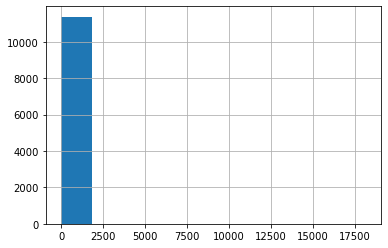

In [31]:
train_temp1['last_login_day'].hist()

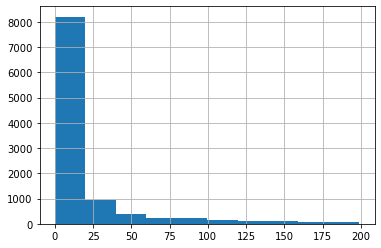

In [32]:
train_temp1[train_temp1['last_login_day'] < 200]['last_login_day'].hist()

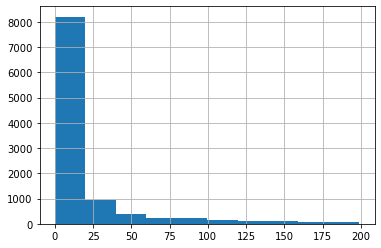

In [33]:
train_temp0[train_temp0['last_login_day'] < 200]['last_login_day'].hist()

In [34]:
train_temp1[train_temp1['last_login_day'] > 15000]

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age,domain,day_of_week,day_of_month
6049,4,2019-07-19 00:00:00+08:00,111486,46,2,18096,Never checkout,1,1,1,...,0,1,6049,nan,1.0,0.0,NaN,@gmail.com,Friday,19
16805,5,2019-07-26 00:00:00+08:00,116708,32,3,18103,Never checkout,1,1,1,...,0,1,16805,nan,1.0,0.0,NaN,@gmail.com,Friday,26
22973,5,2019-07-30 00:00:00+08:00,108846,38,50,18107,Never checkout,1,1,2,...,0,1,22973,nan,1.0,0.0,NaN,@gmail.com,Tuesday,30
36255,5,2019-08-08 00:00:00+08:00,104418,28,Never open,18116,96,0,0,0,...,0,1,36255,nan,1.0,0.0,NaN,@gmail.com,Thursday,8
59580,4,2019-08-25 00:00:00+08:00,120314,38,Never open,18133,Never checkout,1,1,1,...,0,1,59580,nan,1.0,0.0,NaN,@hotmail.com,Sunday,25


In [35]:
len(test[test['last_login_day'] == 'Never login'])

169

Last Checkout Day

In [36]:
train['last_checkout_day'].value_counts()

Never checkout    16905
1                  3184
2                  2611
3                  2159
4                  2065
                  ...  
986                   1
785                   1
1124                  1
1122                  1
1042                  1
Name: last_checkout_day, Length: 947, dtype: int64

In [37]:
last_checkout_day_train = train[train['last_checkout_day'] != 'Never checkout'].last_checkout_day.astype(int)
last_checkout_day_test = test[test['last_checkout_day'] != 'Never checkout'].last_checkout_day.astype(int)
print(last_checkout_day_train.min(), last_checkout_day_train.max())
print(last_checkout_day_test.min(), last_checkout_day_test.max())

1 1445
1 1462


In [38]:
train[(train['last_checkout_day'] == 'Never checkout') & (train['open_flag'] == 1)]

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age,domain,day_of_week,day_of_month
283,6,2019-07-16 00:00:00+08:00,16603,49,3,36,Never checkout,7,11,17,...,0,1,283,nan,1.0,0.0,NaN,@yahoo.com,Tuesday,16
372,4,2019-07-16 00:00:00+08:00,21854,44,22,164,Never checkout,0,1,4,...,0,1,372,1.0,1.0,2.0,25.0,@hotmail.com,Tuesday,16
575,3,2019-07-16 00:00:00+08:00,33012,33,2,632,Never checkout,6,23,34,...,0,1,575,1.0,1.0,1.0,45.0,@gmail.com,Tuesday,16
676,6,2019-07-16 00:00:00+08:00,38234,49,3,584,Never checkout,6,15,26,...,0,1,676,nan,1.0,0.0,NaN,@gmail.com,Tuesday,16
705,2,2019-07-16 00:00:00+08:00,39676,36,3,95,Never checkout,11,18,23,...,7,1,705,1.0,1.0,1.0,29.0,@ymail.com,Tuesday,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73507,2,2019-09-02 00:00:00+08:00,126958,38,12,3,Never checkout,0,0,0,...,0,1,73507,nan,1.0,0.0,NaN,@qq.com,Monday,2
73508,2,2019-09-02 00:00:00+08:00,126959,38,3,243,Never checkout,4,13,28,...,0,1,73508,nan,1.0,0.0,NaN,@gmail.com,Monday,2
73521,6,2019-09-02 00:00:00+08:00,127363,39,18,345,Never checkout,5,8,22,...,0,1,73521,nan,1.0,0.0,NaN,@gmail.com,Monday,2
73528,2,2019-09-02 00:00:00+08:00,127475,38,4,49,Never checkout,1,9,17,...,0,1,73528,nan,1.0,0.0,NaN,@qq.com,Monday,2


In [39]:
train_temp = train[(train['last_checkout_day'] != 'Never checkout') & (train['open_flag'] == 1)]
train_temp['last_checkout_day'] = train_temp['last_checkout_day'].astype(int)

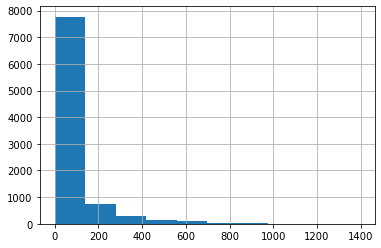

In [40]:
train_temp['last_checkout_day'].hist()

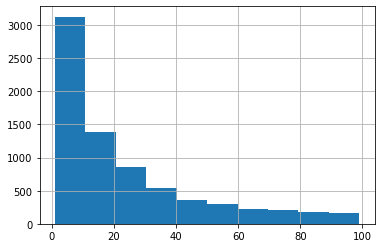

In [41]:
train_temp = train_temp[train_temp['last_checkout_day'] < 100]
train_temp['last_checkout_day'].hist()

In [42]:
train_temp = train[(train['last_checkout_day'] != 'Never checkout') & (train['open_flag'] == 0)]
train_temp['last_checkout_day'] = train_temp['last_checkout_day'].astype(int)

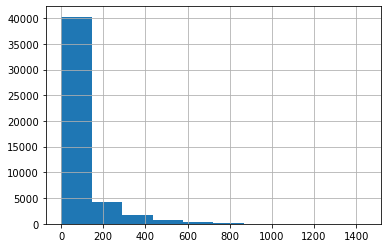

In [43]:
train_temp['last_checkout_day'].hist()

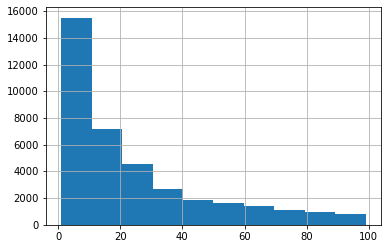

In [44]:
train_temp = train_temp[train_temp['last_checkout_day'] < 100]
train_temp['last_checkout_day'].hist()

Open Count Last 10 days

In [45]:
train['open_count_last_10_days'].value_counts()

0     47406
1     11382
2      5372
3      3291
4      2099
5      1339
6       874
7       654
8       488
9       337
10      195
11       54
12       26
13        9
14        5
16        3
24        2
17        1
19        1
31        1
Name: open_count_last_10_days, dtype: int64

In [46]:
train_flag1 = train[train['open_flag'] == 1]
train_flag0 = train[train['open_flag'] == 0]

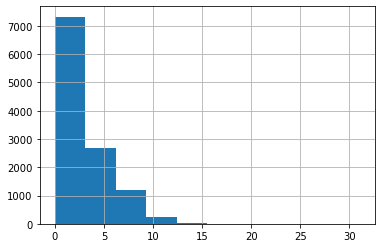

In [47]:
train_flag1['open_count_last_10_days'].hist()

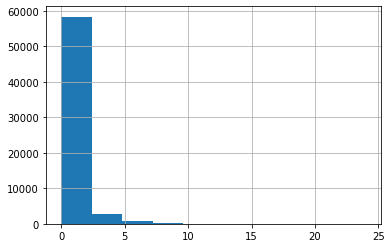

In [48]:
train_flag0['open_count_last_10_days'].hist()

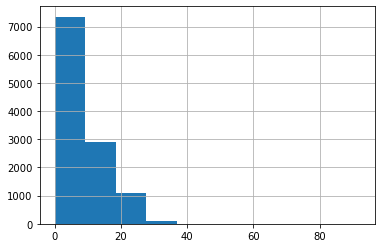

In [49]:
train_flag1['open_count_last_30_days'].hist()

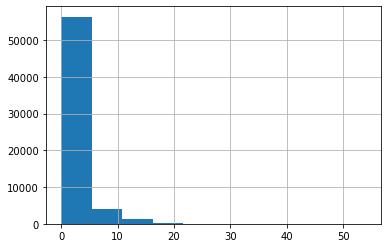

In [50]:
train_flag0['open_count_last_30_days'].hist()

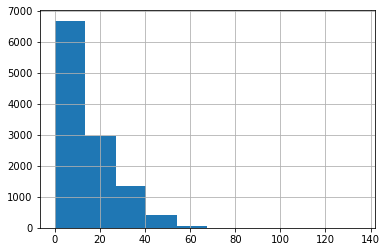

In [51]:
train_flag1['open_count_last_60_days'].hist()

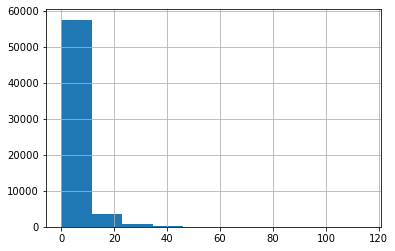

In [52]:
train_flag0['open_count_last_60_days'].hist()

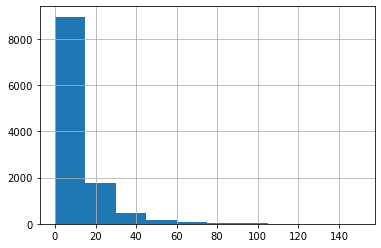

In [53]:
train_flag1['login_count_last_10_days'].hist()

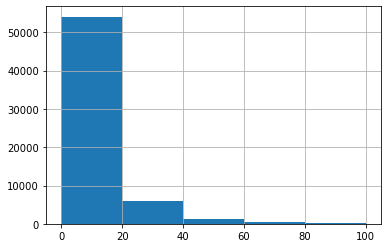

In [54]:
train_flag0['login_count_last_10_days'].hist(bins = [0, 20, 40, 60, 80, 100])

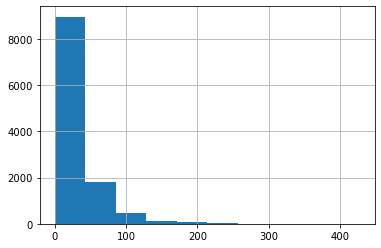

In [55]:
train_flag1['login_count_last_30_days'].hist()

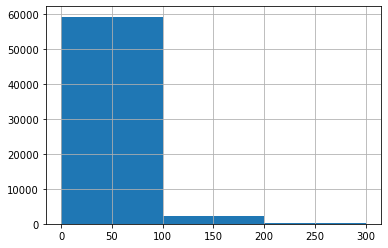

In [56]:
train_flag0['login_count_last_30_days'].hist(bins = [0, 100, 200, 300])

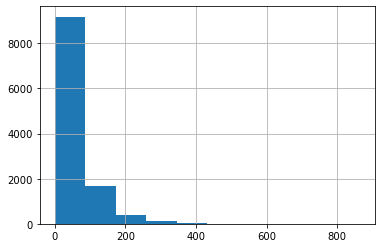

In [57]:
train_flag1['login_count_last_60_days'].hist()

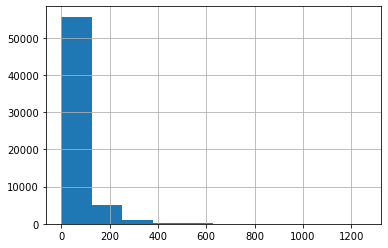

In [58]:
train_flag0['login_count_last_60_days'].hist()

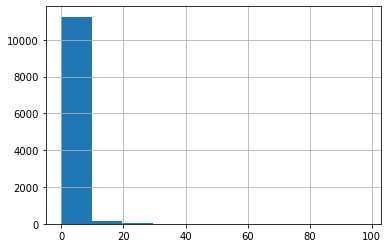

In [59]:
train_flag1['checkout_count_last_10_days'].hist()

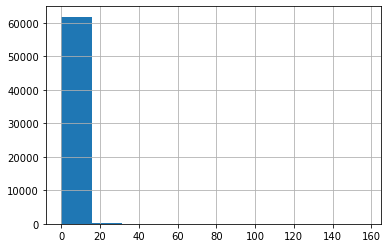

In [60]:
train_flag0['checkout_count_last_10_days'].hist()

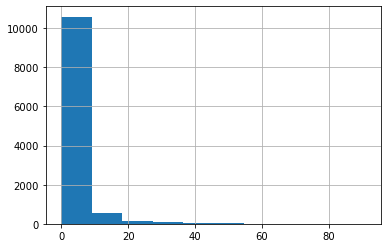

In [61]:
train_flag1[train_flag1['checkout_count_last_30_days'] < 100]['checkout_count_last_30_days'].hist()

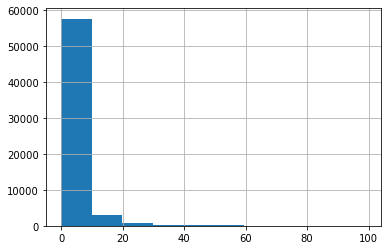

In [62]:
train_flag0[train_flag0['checkout_count_last_30_days'] < 100]['checkout_count_last_30_days'].hist()

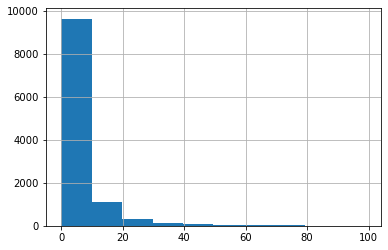

In [63]:
train_flag1[train_flag1['checkout_count_last_60_days'] < 100]['checkout_count_last_60_days'].hist()

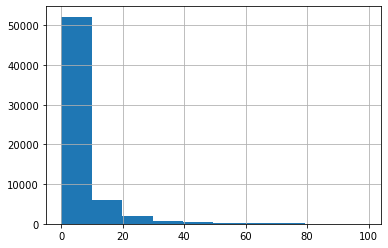

In [64]:
train_flag0[train_flag0['checkout_count_last_60_days'] < 100]['checkout_count_last_60_days'].hist()

# EDA Part 2

In [65]:
train.describe()

,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,age,day_of_month
count,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.00000,45347.000000,73539.000000
mean,63048.595358,43.656373,0.911829,2.780457,5.019364,8.382287,25.284053,49.010430,0.909898,2.796040,5.420960,0.155781,36769.00000,31.445564,16.517263
std,36068.006037,11.219323,1.754052,4.570239,7.902313,13.424436,37.853189,71.819327,2.887416,7.686064,13.980182,0.362650,21229.02506,11.797405,9.253182
min,2.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-17.000000,1.000000
25%,31679.500000,34.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,18384.50000,24.000000,8.000000
50%,63340.000000,43.000000,0.000000,1.000000,2.000000,3.000000,11.000000,22.000000,0.000000,0.000000,1.000000,0.000000,36769.00000,29.000000,18.000000
75%,94731.500000,52.000000,1.000000,3.000000,6.000000,12.000000,35.000000,69.000000,1.000000,3.000000,6.000000,0.000000,55153.50000,36.000000,24.000000
max,127925.000000,75.000000,31.000000,92.000000,135.000000,254.000000,735.000000,1260.000000,157.000000,531.000000,783.000000,1.000000,73538.00000,118.000000,30.000000


In [66]:
test.describe()

,user_id,subject_line_length,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,row_id,age,day_of_month
count,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.000000,55970.00000,34737.000000,55970.000000
mean,65049.007790,42.212703,0.774272,2.441880,5.323530,8.978899,26.289459,50.713882,1.124674,3.219385,5.933893,27984.50000,31.267409,12.644863
std,37934.945847,12.276136,1.752984,4.786883,9.053473,13.975840,38.572656,73.289199,3.500704,8.197445,14.233715,16157.29162,11.312572,7.444977
min,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,3.000000
25%,32293.250000,35.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,13992.25000,24.000000,7.000000
50%,64683.000000,41.000000,0.000000,0.000000,2.000000,4.000000,13.000000,25.000000,0.000000,1.000000,2.000000,27984.50000,29.000000,10.000000
75%,97776.500000,48.000000,1.000000,3.000000,6.000000,13.000000,36.000000,70.000000,1.000000,3.000000,7.000000,41976.75000,36.000000,18.000000
max,127922.000000,79.000000,30.000000,79.000000,120.000000,329.000000,746.000000,1300.000000,252.000000,404.000000,609.000000,55969.00000,118.000000,29.000000


In [67]:
train_flag1 = train[train['open_flag'] == 1]
train_flag0 = train[train['open_flag'] == 0]

Age

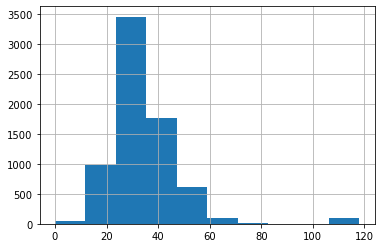

In [68]:
train_flag1['age'].hist()

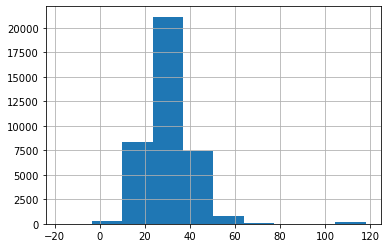

In [69]:
train_flag0['age'].hist()

Dividing the 'age' column into some **age ranges** may get better performance

*I'll try that later*

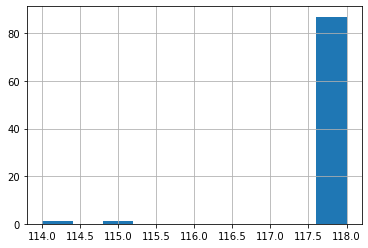

In [70]:
train_flag1[train_flag1['age'] > 110]['age'].hist()

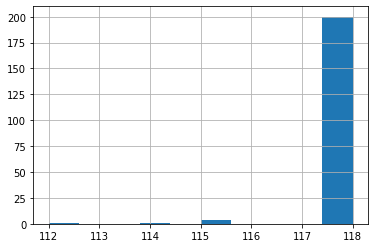

In [71]:
train_flag0[train_flag0['age'] > 110]['age'].hist()

In [72]:
train[(train.age > 116)]

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,checkout_count_last_60_days,open_flag,row_id,attr_1,attr_2,attr_3,age,domain,day_of_week,day_of_month
395,4,2019-07-16 00:00:00+08:00,23206,44,10,2,2,1,1,2,...,16,0,395,1.0,1.0,2.0,118.0,@gmail.com,Tuesday,16
639,4,2019-07-16 00:00:00+08:00,36248,44,9,2,13,1,1,2,...,2,1,639,1.0,1.0,1.0,118.0,@gmail.com,Tuesday,16
677,4,2019-07-16 00:00:00+08:00,38235,44,12,6,42,0,3,3,...,4,0,677,1.0,1.0,2.0,118.0,@hotmail.com,Tuesday,16
862,4,2019-07-16 00:00:00+08:00,47984,44,12,1,128,0,2,2,...,0,1,862,1.0,1.0,2.0,118.0,@gmail.com,Tuesday,16
896,4,2019-07-16 00:00:00+08:00,49721,44,7,12,15,1,1,1,...,4,0,896,1.0,1.0,1.0,118.0,@gmail.com,Tuesday,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70500,4,2019-09-02 00:00:00+08:00,21892,34,10,4,88,1,5,10,...,0,1,70500,1.0,1.0,2.0,118.0,@gmail.com,Monday,2
70889,4,2019-09-02 00:00:00+08:00,35987,34,12,24,71,0,2,3,...,0,0,70889,1.0,1.0,1.0,118.0,@hotmail.com,Monday,2
71126,3,2019-09-02 00:00:00+08:00,44189,64,12,3,3,0,1,5,...,9,0,71126,1.0,1.0,1.0,118.0,other,Monday,2
71868,4,2019-09-02 00:00:00+08:00,70127,34,42,7,37,0,0,0,...,3,0,71868,1.0,1.0,1.0,118.0,@gmail.com,Monday,2


**New feature: 'age_class'**

In [73]:
train['age_class'] = train['age'].isna()
train['age_class'] = train['age_class'].map({True:'Unknown',False:'<>'})

test['age_class'] = test['age'].isna()
test['age_class'] = test['age_class'].map({True:'Unknown',False:'<>'})

train.loc[train['age'] >= 30, 'age_class'] = '>=30'
train.loc[train['age'] < 30, 'age_class'] = '<30'

test.loc[test['age'] >= 30, 'age_class'] = '>=30'
test.loc[test['age'] < 30, 'age_class'] = '<30'

"As of January 9, 2020, there were **31 living supercentenarians** on our list (30 females, 1 male)"
*Source: liebertpub.com*

As of 3 August 2020, the oldest known living person is Kane Tanaka of Japan, aged **117** years, 214 days.

**Age > 110** (supercentenarian) ? Let's set it to **NA**.

In [74]:
train.loc[train['age'] > 110, 'age'] = np.nan
test.loc[test['age'] > 110, 'age'] = np.nan

**Age < 0** ? Let's set it to **NA** too.

In [75]:
train.loc[train['age'] < 0, 'age'] = np.nan
test.loc[test['age'] < 0, 'age'] = np.nan

Domain

In [76]:
train_flag1['domain'].value_counts()

@gmail.com         8854
@yahoo.com          938
@hotmail.com        893
other               379
@icloud.com         134
@qq.com              84
@outlook.com         58
@live.com            50
@ymail.com           35
@163.com             20
@rocketmail.com      11
Name: domain, dtype: int64

In [77]:
train_flag0['domain'].value_counts()

@gmail.com         53816
@yahoo.com          4243
@hotmail.com        2036
other                820
@icloud.com          305
@qq.com              254
@outlook.com         201
@ymail.com           159
@live.com            119
@163.com              88
@rocketmail.com       42
Name: domain, dtype: int64

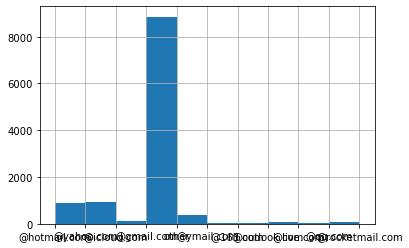

In [78]:
train_flag1['domain'].hist()

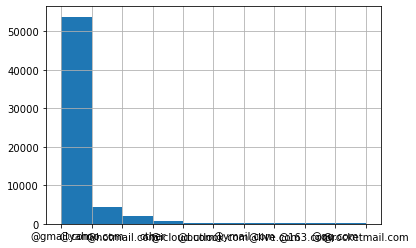

In [79]:
train_flag0['domain'].hist()

**New feature: 'domain_type'**

In [80]:
list_low_domain = ['@163.com','@gmail.com','@yahoo.com','@ymail.com'] # low open rate
list_med_domain = ['@outlook.com','@qq.com','@rocketmail.com'] # medium open rate
list_high_domain = ['@hotmail.com','@icloud.com','@live.com','other'] # high open rate

def make_domain_type(dom) :
    if dom in list_low_domain :
        res = 'low_domain'
    elif dom in list_med_domain :
        res = 'med_domain'
    elif dom in list_high_domain :
        res = 'high_domain'
        
    return res

train['domain_type'] = train.apply(lambda x : make_domain_type(x['domain']), axis=1)
test['domain_type'] = test.apply(lambda x : make_domain_type(x['domain']), axis=1)

Check this [public kernel](https://www.kaggle.com/marcellosusanto/shopee-ma-eda) for better visualizations and additional insights on 'age_class' and 'domain_type'.

User Attributes

In [81]:
train_flag1['attr_1'].value_counts()

1.0    7056
nan    4394
0.0       6
Name: attr_1, dtype: int64

In [82]:
train_flag0['attr_1'].value_counts()

1.0    38280
nan    23798
0.0        5
Name: attr_1, dtype: int64

In [83]:
train[(train['open_flag'] == 1) & (train['attr_1'] == 'nan')]

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,row_id,attr_1,attr_2,attr_3,age,domain,day_of_week,day_of_month,age_class,domain_type
8,1,2019-07-16 00:00:00+08:00,350,49,7,5,26,2,4,7,...,8,nan,1.0,0.0,NaN,@yahoo.com,Tuesday,16,Unknown,low_domain
86,5,2019-07-16 00:00:00+08:00,4478,43,12,18,58,1,2,9,...,86,nan,1.0,0.0,NaN,@yahoo.com,Tuesday,16,Unknown,low_domain
164,3,2019-07-16 00:00:00+08:00,10054,36,36,3,3,0,0,4,...,164,nan,1.0,0.0,NaN,@yahoo.com,Tuesday,16,Unknown,low_domain
168,2,2019-07-16 00:00:00+08:00,10181,48,3,8,13,4,7,12,...,168,nan,1.0,0.0,NaN,@gmail.com,Tuesday,16,Unknown,low_domain
172,5,2019-07-16 00:00:00+08:00,10451,43,25,15,19,0,1,1,...,172,nan,1.0,0.0,NaN,@gmail.com,Tuesday,16,Unknown,low_domain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73508,2,2019-09-02 00:00:00+08:00,126959,38,3,243,Never checkout,4,13,28,...,73508,nan,1.0,0.0,NaN,@gmail.com,Monday,2,Unknown,low_domain
73516,6,2019-09-02 00:00:00+08:00,127132,39,1,1,28,12,25,44,...,73516,nan,1.0,0.0,NaN,@gmail.com,Monday,2,Unknown,low_domain
73521,6,2019-09-02 00:00:00+08:00,127363,39,18,345,Never checkout,5,8,22,...,73521,nan,1.0,0.0,NaN,@gmail.com,Monday,2,Unknown,low_domain
73528,2,2019-09-02 00:00:00+08:00,127475,38,4,49,Never checkout,1,9,17,...,73528,nan,1.0,0.0,NaN,@qq.com,Monday,2,Unknown,med_domain


In [84]:
train[(train['open_flag'] == 0) & (train['attr_1'] == 'nan')]

,country_code,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,...,row_id,attr_1,attr_2,attr_3,age,domain,day_of_week,day_of_month,age_class,domain_type
2,6,2019-07-16 00:00:00+08:00,177,49,14,5,5,0,4,12,...,2,nan,1.0,0.0,NaN,@yahoo.com,Tuesday,16,Unknown,low_domain
4,6,2019-07-16 00:00:00+08:00,221,49,227,6,221,0,0,0,...,4,nan,1.0,0.0,NaN,@hotmail.com,Tuesday,16,Unknown,high_domain
14,2,2019-07-16 00:00:00+08:00,635,36,Never open,44,57,0,0,0,...,14,nan,1.0,0.0,NaN,@hotmail.com,Tuesday,16,Unknown,high_domain
26,1,2019-07-16 00:00:00+08:00,1217,64,70,1396,Never checkout,0,0,0,...,26,nan,1.0,0.0,NaN,@gmail.com,Tuesday,16,Unknown,low_domain
29,4,2019-07-16 00:00:00+08:00,1349,40,26,6,139,0,1,1,...,29,nan,1.0,0.0,NaN,@hotmail.com,Tuesday,16,Unknown,high_domain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73531,4,2019-09-02 00:00:00+08:00,127547,34,45,3,73,0,0,3,...,73531,nan,1.0,0.0,NaN,@gmail.com,Monday,2,Unknown,low_domain
73532,1,2019-09-02 00:00:00+08:00,127595,33,8,18,Never checkout,1,3,3,...,73532,nan,1.0,0.0,NaN,@gmail.com,Monday,2,Unknown,low_domain
73534,6,2019-09-02 00:00:00+08:00,127613,39,24,36,279,0,1,1,...,73534,nan,1.0,0.0,NaN,@hotmail.com,Monday,2,Unknown,high_domain
73536,2,2019-09-02 00:00:00+08:00,127696,32,Never open,Never login,Never checkout,0,0,0,...,73536,nan,nan,0.0,NaN,@gmail.com,Monday,2,Unknown,low_domain


In [85]:
train_flag1['attr_2'].value_counts()

1.0    11353
nan       74
0.0       29
Name: attr_2, dtype: int64

In [86]:
train_flag0['attr_2'].value_counts()

1.0    61706
nan      205
0.0      172
Name: attr_2, dtype: int64

In [87]:
train_flag1['attr_3'].value_counts()

0.0    4397
2.0    3450
1.0    3041
4.0     310
3.0     258
Name: attr_3, dtype: int64

In [88]:
train_flag0['attr_3'].value_counts()

0.0    23811
2.0    19954
1.0    14719
4.0     1886
3.0     1713
Name: attr_3, dtype: int64

**Clean data**

In [89]:
train.isna().sum()

country_code                       0
grass_date                         0
user_id                            0
subject_line_length                0
last_open_day                      0
last_login_day                     0
last_checkout_day                  0
open_count_last_10_days            0
open_count_last_30_days            0
open_count_last_60_days            0
login_count_last_10_days           0
login_count_last_30_days           0
login_count_last_60_days           0
checkout_count_last_10_days        0
checkout_count_last_30_days        0
checkout_count_last_60_days        0
open_flag                          0
row_id                             0
attr_1                             0
attr_2                             0
attr_3                             0
age                            28489
domain                             0
day_of_week                        0
day_of_month                       0
age_class                          0
domain_type                        0
d

In [90]:
test.isna().sum()

country_code                       0
grass_date                         0
user_id                            0
subject_line_length                0
last_open_day                      0
last_login_day                     0
last_checkout_day                  0
open_count_last_10_days            0
open_count_last_30_days            0
open_count_last_60_days            0
login_count_last_10_days           0
login_count_last_30_days           0
login_count_last_60_days           0
checkout_count_last_10_days        0
checkout_count_last_30_days        0
checkout_count_last_60_days        0
row_id                             0
attr_1                             0
attr_2                             0
attr_3                             0
age                            21406
domain                             0
day_of_week                        0
day_of_month                       0
age_class                          0
domain_type                        0
dtype: int64

In [91]:
train[['attr_1', 'attr_2', 'attr_3']]

,attr_1,attr_2,attr_3
0,1.0,1.0,2.0
1,1.0,1.0,2.0
2,nan,1.0,0.0
3,1.0,1.0,2.0
4,nan,1.0,0.0
...,...,...,...
73534,nan,1.0,0.0
73535,1.0,1.0,2.0
73536,nan,nan,0.0
73537,1.0,1.0,1.0


In [92]:
# add a new unknown variable per attribute
train['attr_1'] = train['attr_1'].replace(['nan'], '2.0')
train['attr_2'] = train['attr_2'].replace(['nan'], '2.0')
test['attr_1'] = test['attr_1'].replace(['nan'], '2.0')
test['attr_2'] = test['attr_2'].replace(['nan'], '2.0')

# print(train['attr_1'].isna().sum(), test['attr_1'].isna().sum())
# print(train['attr_2'].isna().sum(), test['attr_1'].isna().sum())

In [93]:
train['attr_1'].value_counts()

1.0    45336
2.0    28192
0.0       11
Name: attr_1, dtype: int64

In [94]:
train.isna().sum()

country_code                       0
grass_date                         0
user_id                            0
subject_line_length                0
last_open_day                      0
last_login_day                     0
last_checkout_day                  0
open_count_last_10_days            0
open_count_last_30_days            0
open_count_last_60_days            0
login_count_last_10_days           0
login_count_last_30_days           0
login_count_last_60_days           0
checkout_count_last_10_days        0
checkout_count_last_30_days        0
checkout_count_last_60_days        0
open_flag                          0
row_id                             0
attr_1                             0
attr_2                             0
attr_3                             0
age                            28489
domain                             0
day_of_week                        0
day_of_month                       0
age_class                          0
domain_type                        0
d

In [95]:
test.isna().sum()

country_code                       0
grass_date                         0
user_id                            0
subject_line_length                0
last_open_day                      0
last_login_day                     0
last_checkout_day                  0
open_count_last_10_days            0
open_count_last_30_days            0
open_count_last_60_days            0
login_count_last_10_days           0
login_count_last_30_days           0
login_count_last_60_days           0
checkout_count_last_10_days        0
checkout_count_last_30_days        0
checkout_count_last_60_days        0
row_id                             0
attr_1                             0
attr_2                             0
attr_3                             0
age                            21406
domain                             0
day_of_week                        0
day_of_month                       0
age_class                          0
domain_type                        0
dtype: int64

# Extract features

**Convert non-numerical features to numerical features for modeling**

In [96]:
train._get_numeric_data().columns

Index(['user_id', 'subject_line_length', 'open_count_last_10_days',
       'open_count_last_30_days', 'open_count_last_60_days',
       'login_count_last_10_days', 'login_count_last_30_days',
       'login_count_last_60_days', 'checkout_count_last_10_days',
       'checkout_count_last_30_days', 'checkout_count_last_60_days',
       'open_flag', 'row_id', 'age', 'day_of_month'],
      dtype='object')

Grass Date

In [97]:
train['grass_date'] = train['grass_date'].dt.tz_convert(None)
train['grass_date'] = (train['grass_date'] - dt.datetime(1970,1,1)).dt.total_seconds()

test['grass_date'] = test['grass_date'].dt.tz_convert(None)
test['grass_date'] = (test['grass_date'] - dt.datetime(1970,1,1)).dt.total_seconds()

Let's add **new features** from what we know about: 'last_open_day', 'last_login_day', 'last_checkout_day'

In [98]:
# never_open, boolean
train['never_open'] = train['last_open_day'].apply(lambda x: 'never_open' if x == 'Never open' else 'open')
test['never_open'] = test['last_open_day'].apply(lambda x: 'never_open' if x == 'Never open' else 'open')

# never_login, boolean
train['never_login'] = train['last_login_day'].apply(lambda x: 'never_login' if x == 'Never login' else 'login')
test['never_login'] = test['last_login_day'].apply(lambda x: 'never_login' if x == 'Never login' else 'login')

# never_checkout, boolean
train['never_checkout'] = train['last_checkout_day'].apply(lambda x: 'never_checkout' if x == 'Never checkout' else 'checkout')
test['never_checkout'] = test['last_checkout_day'].apply(lambda x: 'never_checkout' if x == 'Never checkout' else 'checkout')

In [99]:
train['never_open'].value_counts()

open          66021
never_open     7518
Name: never_open, dtype: int64

**Convert to numerical:**

last_open_day, last_login_day, last_checkout_day

In [100]:
train[['last_open_day', 'last_login_day', 'last_checkout_day']]

,last_open_day,last_login_day,last_checkout_day
0,19,6,18
1,9,4,8
2,14,5,5
3,49,9,53
4,227,6,221
...,...,...,...
73534,24,36,279
73535,46,10,51
73536,Never open,Never login,Never checkout
73537,5,34,Never checkout


In [101]:
train['last_open_day'].value_counts()

Never open    7518
1             5051
2             4429
3             3353
4             2848
              ... 
420              1
463              1
440              1
573              1
400              1
Name: last_open_day, Length: 549, dtype: int64

In [102]:
len(train[train['last_open_day'] == '0'])

0

In [103]:
train['last_open_day'] = train['last_open_day'].replace(['Never open'], 1000)
train['last_open_day'] = train['last_open_day'].astype(int)
train['last_open_day'].value_counts()

1000    7518
1       5051
2       4429
3       3353
4       2848
        ... 
587        1
545        1
331        1
737        1
703        1
Name: last_open_day, Length: 549, dtype: int64

In [104]:
test['last_open_day'] = test['last_open_day'].replace(['Never open'], 1000)
test['last_open_day'] = test['last_open_day'].astype(int)
test['last_open_day'].value_counts()

1000    7589
1       3753
2       2616
3       1990
4       1703
        ... 
812        1
396        1
364        1
300        1
591        1
Name: last_open_day, Length: 491, dtype: int64

In [105]:
train['last_login_day'] = train['last_login_day'].replace(['Never login'], 19000)
train['last_login_day'] = train['last_login_day'].astype(int)
train['last_login_day'].value_counts()

1        10852
2         6382
3         5007
4         3972
5         3156
         ...  
927          1
1119         1
892          1
1148         1
18103        1
Name: last_login_day, Length: 893, dtype: int64

In [106]:
test['last_login_day'] = test['last_login_day'].replace(['Never login'], 19000)
test['last_login_day'] = test['last_login_day'].astype(int)
test['last_login_day'].value_counts()

1        8647
2        5216
3        3932
4        3167
5        2593
         ... 
586         1
603         1
18145       1
1353        1
1055        1
Name: last_login_day, Length: 829, dtype: int64

In [107]:
train['last_checkout_day'].value_counts()

Never checkout    16905
1                  3184
2                  2611
3                  2159
4                  2065
                  ...  
986                   1
785                   1
1124                  1
1122                  1
1042                  1
Name: last_checkout_day, Length: 947, dtype: int64

In [108]:
len(train[train['last_checkout_day'] == '0'])

0

In [109]:
train['last_checkout_day'] = train['last_checkout_day'].replace(['Never checkout'], 1500)
train['last_checkout_day'] = train['last_checkout_day'].astype(int)
train['last_checkout_day'].value_counts()

1500    16905
1        3184
2        2611
3        2159
4        2065
        ...  
546         1
674         1
1122        1
1186        1
1087        1
Name: last_checkout_day, Length: 947, dtype: int64

In [110]:
test['last_checkout_day'] = test['last_checkout_day'].replace(['Never checkout'], 1500)
test['last_checkout_day'] = test['last_checkout_day'].astype(int)
test['last_checkout_day'].value_counts()

1500    11403
1        2851
2        2234
3        1944
4        1699
        ...  
1424        1
497         1
561         1
625         1
687         1
Name: last_checkout_day, Length: 898, dtype: int64

Let's check the types again

In [111]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73539 entries, 0 to 73538
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country_code                 73539 non-null  object 
 1   grass_date                   73539 non-null  float64
 2   user_id                      73539 non-null  int64  
 3   subject_line_length          73539 non-null  int64  
 4   last_open_day                73539 non-null  int64  
 5   last_login_day               73539 non-null  int64  
 6   last_checkout_day            73539 non-null  int64  
 7   open_count_last_10_days      73539 non-null  int64  
 8   open_count_last_30_days      73539 non-null  int64  
 9   open_count_last_60_days      73539 non-null  int64  
 10  login_count_last_10_days     73539 non-null  int64  
 11  login_count_last_30_days     73539 non-null  int64  
 12  login_count_last_60_days     73539 non-null  int64  
 13  checkout_count_l

In [112]:
train_feat = train._get_numeric_data()
train_feat

,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,login_count_last_30_days,login_count_last_60_days,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,age,day_of_month
0,1.563206e+09,43,44,19,6,18,0,2,4,12,43,99,0,5,10,0,0,47.0,16
1,1.563206e+09,102,44,9,4,8,2,9,17,18,48,90,1,1,4,1,1,25.0,16
2,1.563206e+09,177,49,14,5,5,0,4,12,24,69,119,5,19,27,0,2,NaN,16
3,1.563206e+09,184,49,49,9,53,0,0,1,9,23,69,1,3,6,0,3,24.0,16
4,1.563206e+09,221,49,227,6,221,0,0,0,2,5,5,0,0,0,0,4,NaN,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,1.567354e+09,127613,39,24,36,279,0,1,1,0,0,0,0,0,0,0,73534,NaN,2
73535,1.567354e+09,127620,38,46,10,51,0,0,1,0,0,0,0,0,0,0,73535,30.0,2
73536,1.567354e+09,127696,32,1000,19000,1500,0,0,0,0,0,0,0,0,0,0,73536,NaN,2
73537,1.567354e+09,127807,38,5,34,1500,2,4,4,0,0,0,0,0,0,1,73537,38.0,2


In [113]:
test_feat = test._get_numeric_data()

One Hot Encoding: 'domain' column

In [114]:
dom_flag = pd.get_dummies(train['domain'])
train_feat = pd.concat([train_feat, dom_flag], axis = 1)
train_feat

,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other
0,1.563206e+09,43,44,19,6,18,0,2,4,12,...,1,0,0,0,0,0,0,0,0,0
1,1.563206e+09,102,44,9,4,8,2,9,17,18,...,0,1,0,0,0,0,0,0,0,0
2,1.563206e+09,177,49,14,5,5,0,4,12,24,...,0,0,0,0,0,0,0,1,0,0
3,1.563206e+09,184,49,49,9,53,0,0,1,9,...,0,0,0,0,0,0,0,1,0,0
4,1.563206e+09,221,49,227,6,221,0,0,0,2,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,1.567354e+09,127613,39,24,36,279,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
73535,1.567354e+09,127620,38,46,10,51,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
73536,1.567354e+09,127696,32,1000,19000,1500,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
73537,1.567354e+09,127807,38,5,34,1500,2,4,4,0,...,1,0,0,0,0,0,0,0,0,0


In [115]:
dom_flag

,@163.com,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other
0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
73534,0,0,1,0,0,0,0,0,0,0,0
73535,0,1,0,0,0,0,0,0,0,0,0
73536,0,1,0,0,0,0,0,0,0,0,0
73537,0,1,0,0,0,0,0,0,0,0,0


In [116]:
dom_flag_test = pd.get_dummies(test['domain'])
test_feat = pd.concat([test_feat, dom_flag_test], axis = 1)
test_feat

,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,@gmail.com,@hotmail.com,@icloud.com,@live.com,@outlook.com,@qq.com,@rocketmail.com,@yahoo.com,@ymail.com,other
0,1.567440e+09,0,35,27,2,13,2,3,4,10,...,1,0,0,0,0,0,0,0,0,0
1,1.567440e+09,130,35,7,5,383,1,1,1,5,...,1,0,0,0,0,0,0,0,0,0
2,1.567440e+09,150,25,34,1,3,0,0,0,13,...,1,0,0,0,0,0,0,0,0,0
3,1.567440e+09,181,36,63,5,5,0,0,0,43,...,0,0,0,0,0,0,0,1,0,0
4,1.567440e+09,192,23,6,5,54,0,0,0,4,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,1.569686e+09,127348,53,1000,4,8,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
55966,1.569686e+09,127396,53,59,802,1207,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
55967,1.569686e+09,127574,43,1000,7,1500,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
55968,1.569686e+09,127887,43,5,5,6,2,5,14,0,...,1,0,0,0,0,0,0,0,0,0


One Hot Encoding: 'country_code' column

In [117]:
ccode_flag = pd.get_dummies(train['country_code'])
train_feat = pd.concat([train_feat, ccode_flag], axis = 1)
train_feat

,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,@yahoo.com,@ymail.com,other,1,2,3,4,5,6,7
0,1.563206e+09,43,44,19,6,18,0,2,4,12,...,0,0,0,0,0,0,1,0,0,0
1,1.563206e+09,102,44,9,4,8,2,9,17,18,...,0,0,0,0,0,0,1,0,0,0
2,1.563206e+09,177,49,14,5,5,0,4,12,24,...,1,0,0,0,0,0,0,0,1,0
3,1.563206e+09,184,49,49,9,53,0,0,1,9,...,1,0,0,1,0,0,0,0,0,0
4,1.563206e+09,221,49,227,6,221,0,0,0,2,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,1.567354e+09,127613,39,24,36,279,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0
73535,1.567354e+09,127620,38,46,10,51,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
73536,1.567354e+09,127696,32,1000,19000,1500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
73537,1.567354e+09,127807,38,5,34,1500,2,4,4,0,...,0,0,0,0,1,0,0,0,0,0


In [118]:
ccode_flag_test = pd.get_dummies(test['country_code'])
test_feat = pd.concat([test_feat, ccode_flag_test], axis = 1)
test_feat

,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,@yahoo.com,@ymail.com,other,1,2,3,4,5,6,7
0,1.567440e+09,0,35,27,2,13,2,3,4,10,...,0,0,0,0,0,0,0,0,1,0
1,1.567440e+09,130,35,7,5,383,1,1,1,5,...,0,0,0,0,0,0,0,0,1,0
2,1.567440e+09,150,25,34,1,3,0,0,0,13,...,0,0,0,0,0,0,0,1,0,0
3,1.567440e+09,181,36,63,5,5,0,0,0,43,...,1,0,0,1,0,0,0,0,0,0
4,1.567440e+09,192,23,6,5,54,0,0,0,4,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,1.569686e+09,127348,53,1000,4,8,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
55966,1.569686e+09,127396,53,59,802,1207,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
55967,1.569686e+09,127574,43,1000,7,1500,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
55968,1.569686e+09,127887,43,5,5,6,2,5,14,0,...,0,0,0,0,0,0,0,0,1,0


One Hot Encoding: Day of Week

In [119]:
dweek_flag = pd.get_dummies(train['day_of_week'])
train_feat = pd.concat([train_feat, dweek_flag], axis = 1)
train_feat

,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,5,6,7,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1.563206e+09,43,44,19,6,18,0,2,4,12,...,0,0,0,0,0,0,0,0,1,0
1,1.563206e+09,102,44,9,4,8,2,9,17,18,...,0,0,0,0,0,0,0,0,1,0
2,1.563206e+09,177,49,14,5,5,0,4,12,24,...,0,1,0,0,0,0,0,0,1,0
3,1.563206e+09,184,49,49,9,53,0,0,1,9,...,0,0,0,0,0,0,0,0,1,0
4,1.563206e+09,221,49,227,6,221,0,0,0,2,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,1.567354e+09,127613,39,24,36,279,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0
73535,1.567354e+09,127620,38,46,10,51,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
73536,1.567354e+09,127696,32,1000,19000,1500,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
73537,1.567354e+09,127807,38,5,34,1500,2,4,4,0,...,0,0,0,0,1,0,0,0,0,0


In [120]:
dweek_flag_test = pd.get_dummies(test['day_of_week'])
test_feat = pd.concat([test_feat, dweek_flag_test], axis = 1)
test_feat

,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,5,6,7,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,1.567440e+09,0,35,27,2,13,2,3,4,10,...,0,1,0,0,0,0,0,0,1,0
1,1.567440e+09,130,35,7,5,383,1,1,1,5,...,0,1,0,0,0,0,0,0,1,0
2,1.567440e+09,150,25,34,1,3,0,0,0,13,...,1,0,0,0,0,0,0,0,1,0
3,1.567440e+09,181,36,63,5,5,0,0,0,43,...,0,0,0,0,0,0,0,0,1,0
4,1.567440e+09,192,23,6,5,54,0,0,0,4,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,1.569686e+09,127348,53,1000,4,8,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
55966,1.569686e+09,127396,53,59,802,1207,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
55967,1.569686e+09,127574,43,1000,7,1500,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
55968,1.569686e+09,127887,43,5,5,6,2,5,14,0,...,0,1,0,0,0,0,1,0,0,0


One Hot Encoding: Never open, login, checkout

In [121]:
open_flag = pd.get_dummies(train['never_open'])
train_feat = pd.concat([train_feat, open_flag], axis = 1)
print(train_feat.shape)

open_flag_test = pd.get_dummies(test['never_open'])
test_feat = pd.concat([test_feat, open_flag_test], axis = 1)
print(test_feat.shape)

(73539, 46)
(55970, 45)


In [122]:
login_flag = pd.get_dummies(train['never_login'])
train_feat = pd.concat([train_feat, login_flag], axis = 1)
print(train_feat.shape)

login_flag_test = pd.get_dummies(test['never_login'])
test_feat = pd.concat([test_feat, login_flag_test], axis = 1)
print(test_feat.shape)

(73539, 48)
(55970, 47)


In [123]:
checkout_flag = pd.get_dummies(train['never_checkout'])
train_feat = pd.concat([train_feat, checkout_flag], axis = 1)
print(train_feat.shape)

checkout_flag_test = pd.get_dummies(test['never_checkout'])
test_feat = pd.concat([test_feat, checkout_flag_test], axis = 1)
print(test_feat.shape)

(73539, 50)
(55970, 49)


One Hot Encoding: attr_1/2/3

In [124]:
attr1_mapper_encode = {'0.0': 'attr_10',
                       '1.0': 'attr_11',
                       '2.0': 'attr_12'}

train['attr_1'] = train['attr_1'].map(attr1_mapper_encode)
test['attr_1'] = test['attr_1'].map(attr1_mapper_encode)

In [125]:
attr2_mapper_encode = {'0.0': 'attr_20',
                       '1.0': 'attr_21',
                       '2.0': 'attr_22'}

train['attr_2'] = train['attr_2'].map(attr2_mapper_encode)
test['attr_2'] = test['attr_2'].map(attr2_mapper_encode)

In [126]:
attr3_mapper_encode = {'0.0': 'attr_30',
                       '1.0': 'attr_31',
                       '2.0': 'attr_32',
                       '3.0': 'attr_33', 
                       '4.0': 'attr_34'}

train['attr_3'] = train['attr_3'].map(attr3_mapper_encode)
test['attr_3'] = test['attr_3'].map(attr3_mapper_encode)

In [127]:
attr1_flag = pd.get_dummies(train['attr_1'])
train_feat = pd.concat([train_feat, attr1_flag], axis = 1)
print(train_feat.shape)

attr1_flag_test = pd.get_dummies(test['attr_1'])
test_feat = pd.concat([test_feat, attr1_flag_test], axis = 1)
print(test_feat.shape)

(73539, 53)
(55970, 52)


In [128]:
attr2_flag = pd.get_dummies(train['attr_2'])
train_feat = pd.concat([train_feat, attr2_flag], axis = 1)
print(train_feat.shape)

attr2_flag_test = pd.get_dummies(test['attr_2'])
test_feat = pd.concat([test_feat, attr2_flag_test], axis = 1)
print(test_feat.shape)

(73539, 56)
(55970, 55)


In [129]:
attr3_flag = pd.get_dummies(train['attr_3'])
train_feat = pd.concat([train_feat, attr3_flag], axis = 1)
print(train_feat.shape)

attr3_flag_test = pd.get_dummies(test['attr_3'])
test_feat = pd.concat([test_feat, attr3_flag_test], axis = 1)
print(test_feat.shape)

(73539, 61)
(55970, 60)


In [130]:
train.dtypes

country_code                    object
grass_date                     float64
user_id                          int64
subject_line_length              int64
last_open_day                    int64
last_login_day                   int64
last_checkout_day                int64
open_count_last_10_days          int64
open_count_last_30_days          int64
open_count_last_60_days          int64
login_count_last_10_days         int64
login_count_last_30_days         int64
login_count_last_60_days         int64
checkout_count_last_10_days      int64
checkout_count_last_30_days      int64
checkout_count_last_60_days      int64
open_flag                        int64
row_id                           int64
attr_1                          object
attr_2                          object
attr_3                          object
age                            float64
domain                          object
day_of_week                     object
day_of_month                     int64
age_class                

Let's see what we have so far

In [131]:
train_feat

,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,attr_11,attr_12,attr_20,attr_21,attr_22,attr_30,attr_31,attr_32,attr_33,attr_34
0,1.563206e+09,43,44,19,6,18,0,2,4,12,...,1,0,0,1,0,0,0,1,0,0
1,1.563206e+09,102,44,9,4,8,2,9,17,18,...,1,0,0,1,0,0,0,1,0,0
2,1.563206e+09,177,49,14,5,5,0,4,12,24,...,0,1,0,1,0,1,0,0,0,0
3,1.563206e+09,184,49,49,9,53,0,0,1,9,...,1,0,0,1,0,0,0,1,0,0
4,1.563206e+09,221,49,227,6,221,0,0,0,2,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73534,1.567354e+09,127613,39,24,36,279,0,1,1,0,...,0,1,0,1,0,1,0,0,0,0
73535,1.567354e+09,127620,38,46,10,51,0,0,1,0,...,1,0,0,1,0,0,0,1,0,0
73536,1.567354e+09,127696,32,1000,19000,1500,0,0,0,0,...,0,1,0,0,1,1,0,0,0,0
73537,1.567354e+09,127807,38,5,34,1500,2,4,4,0,...,1,0,0,1,0,0,1,0,0,0


In [132]:
test_feat

,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,attr_11,attr_12,attr_20,attr_21,attr_22,attr_30,attr_31,attr_32,attr_33,attr_34
0,1.567440e+09,0,35,27,2,13,2,3,4,10,...,0,1,0,1,0,1,0,0,0,0
1,1.567440e+09,130,35,7,5,383,1,1,1,5,...,0,1,0,1,0,1,0,0,0,0
2,1.567440e+09,150,25,34,1,3,0,0,0,13,...,1,0,0,1,0,0,0,1,0,0
3,1.567440e+09,181,36,63,5,5,0,0,0,43,...,1,0,0,1,0,0,0,1,0,0
4,1.567440e+09,192,23,6,5,54,0,0,0,4,...,0,1,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55965,1.569686e+09,127348,53,1000,4,8,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
55966,1.569686e+09,127396,53,59,802,1207,0,0,1,0,...,0,1,0,1,0,1,0,0,0,0
55967,1.569686e+09,127574,43,1000,7,1500,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0
55968,1.569686e+09,127887,43,5,5,6,2,5,14,0,...,0,1,0,1,0,1,0,0,0,0


In [133]:
features = [c for c in train_feat.columns if c not in ['open_flag', 'user_id', 'row_id', 'age_class', 'domain_type', 'day_of_month']]
len(features)

57

Last minute imputation on 'age' column

In [134]:
!pip install impyute

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [135]:
print(list(train_feat[features].columns).index('age'), list(test_feat[features].columns).index('age'))

14 14


In [136]:
from impyute.imputation.cs import mice

train_imputed = mice(train_feat[features].values)
mice_ages = train_imputed[:, list(train_feat[features].columns).index('age')]
train_feat['age'] = mice_ages

test_imputed = mice(test_feat[features].values)
mice_ages_test = test_imputed[:, list(test_feat[features].columns).index('age')]
test_feat['age'] = mice_ages_test

Distribution Comparison

In [137]:
train['age'].describe()

count    45050.000000
mean        30.881554
std          9.525043
min          0.000000
25%         24.000000
50%         29.000000
75%         36.000000
max        110.000000
Name: age, dtype: float64

In [138]:
train_feat['age'].describe()

count    73539.000000
mean        31.274904
std          7.694697
min          0.000000
25%         27.000000
50%         30.361492
75%         34.211518
max        110.000000
Name: age, dtype: float64

In [139]:
test['age'].describe()

count    34564.000000
mean        30.833960
std          9.533456
min          0.000000
25%         24.000000
50%         29.000000
75%         36.000000
max        110.000000
Name: age, dtype: float64

In [140]:
test_feat['age'].describe()

count    55970.000000
mean        31.938524
std          7.906112
min          0.000000
25%         27.000000
50%         31.695918
75%         35.657961
max        110.000000
Name: age, dtype: float64

Last minute additional features

In [141]:
train['20_interval'] = train['open_count_last_30_days'] - train['open_count_last_10_days']
train['30_interval'] = train['open_count_last_60_days'] - train['open_count_last_30_days']
train['50_interval'] = train['open_count_last_60_days'] - train['open_count_last_10_days']

test['20_interval'] = test['open_count_last_30_days'] - test['open_count_last_10_days']
test['30_interval'] = test['open_count_last_60_days'] - test['open_count_last_30_days']
test['50_interval'] = test['open_count_last_60_days'] - test['open_count_last_10_days']

In [142]:
train['age'] = train_feat['age']
test['age'] = test_feat['age']

train['domain'] = train['domain'].astype('category')
test['domain'] = test['domain'].astype('category')

train['country_code'] = train['country_code'].astype('category')
test['country_code'] = test['country_code'].astype('category')

train['day_of_week'] = train['day_of_week'].astype('category')
test['day_of_week'] = test['day_of_week'].astype('category')

train['attr_1'] = train['attr_1'].astype('category')
test['attr_1'] = test['attr_1'].astype('category')

train['attr_2'] = train['attr_2'].astype('category')
test['attr_2'] = test['attr_2'].astype('category')

train['attr_3'] = train['attr_3'].astype('category')
test['attr_3'] = test['attr_3'].astype('category')

train['never_open'] = train['never_open'].astype('category')
test['never_open'] = test['never_open'].astype('category')

train['never_login'] = train['never_login'].astype('category')
test['never_login'] = test['never_login'].astype('category')

train['never_checkout'] = train['never_checkout'].astype('category')
test['never_checkout'] = test['never_checkout'].astype('category')

train['age_class'] = train['age_class'].astype('category')
test['age_class'] = test['age_class'].astype('category')

train['domain_type'] = train['domain_type'].astype('category')
test['domain_type'] = test['domain_type'].astype('category')

In [143]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73539 entries, 0 to 73538
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   country_code                 73539 non-null  category
 1   grass_date                   73539 non-null  float64 
 2   user_id                      73539 non-null  int64   
 3   subject_line_length          73539 non-null  int64   
 4   last_open_day                73539 non-null  int64   
 5   last_login_day               73539 non-null  int64   
 6   last_checkout_day            73539 non-null  int64   
 7   open_count_last_10_days      73539 non-null  int64   
 8   open_count_last_30_days      73539 non-null  int64   
 9   open_count_last_60_days      73539 non-null  int64   
 10  login_count_last_10_days     73539 non-null  int64   
 11  login_count_last_30_days     73539 non-null  int64   
 12  login_count_last_60_days     73539 non-null  int64   
 13  c

In [144]:
train.describe()

,grass_date,user_id,subject_line_length,last_open_day,last_login_day,last_checkout_day,open_count_last_10_days,open_count_last_30_days,open_count_last_60_days,login_count_last_10_days,...,checkout_count_last_10_days,checkout_count_last_30_days,checkout_count_last_60_days,open_flag,row_id,age,day_of_month,20_interval,30_interval,50_interval
count,7.353900e+04,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000,...,73539.000000,73539.000000,73539.000000,73539.000000,73539.00000,73539.000000,73539.000000,73539.000000,73539.000000,73539.000000
mean,1.565331e+09,63048.595358,43.656373,131.636288,125.217544,401.533227,0.911829,2.780457,5.019364,8.382287,...,0.909898,2.796040,5.420960,0.155781,36769.00000,31.274904,16.517263,1.868628,2.238907,4.107535
std,1.258417e+06,36068.006037,11.219323,297.657294,1214.701680,610.799974,1.754052,4.570239,7.902313,13.424436,...,2.887416,7.686064,13.980182,0.362650,21229.02506,7.694697,9.253182,3.145829,3.945820,6.594491
min,1.563206e+09,2.000000,10.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,1.564243e+09,31679.500000,34.000000,6.000000,3.000000,10.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,18384.50000,27.000000,8.000000,0.000000,0.000000,0.000000
50%,1.565280e+09,63340.000000,43.000000,18.000000,8.000000,44.000000,0.000000,1.000000,2.000000,3.000000,...,0.000000,0.000000,1.000000,0.000000,36769.00000,30.361492,18.000000,1.000000,1.000000,1.000000
75%,1.566403e+09,94731.500000,52.000000,56.000000,27.000000,456.000000,1.000000,3.000000,6.000000,12.000000,...,1.000000,3.000000,6.000000,0.000000,55153.50000,34.211518,24.000000,2.000000,3.000000,5.000000
max,1.567354e+09,127925.000000,75.000000,1000.000000,19000.000000,1500.000000,31.000000,92.000000,135.000000,254.000000,...,157.000000,531.000000,783.000000,1.000000,73538.00000,110.000000,30.000000,61.000000,61.000000,104.000000


Save to file: train and test features

In [145]:
train.to_csv('train_feat.csv', index = False)
test.to_csv('test_feat.csv', index = False)

# Import preprocessed train and test features

In [146]:
# train_feat = pd.read_csv('../input/shopee-code-league-2020-marketing-analytics/train_feat.csv')
# test_feat = pd.read_csv('../input/shopee-code-league-2020-marketing-analytics/test_feat.csv')
# print(train_feat.shape, test_feat.shape)

In [147]:
# label = train_feat['open_flag']

In [148]:
# samp_sub = pd.read_csv('../input/open-shopee-code-league-marketing-analytics/sample_submission_0_1.csv')
# print(samp_sub.shape)

In [149]:
train_feat_copy = train.copy()
test_feat_copy = test.copy()

**Features and label**

In [150]:
features = [c for c in train.columns if c not in ['open_flag', 'user_id', 'row_id']]
feat_label = [c for c in train.columns if c not in ['user_id', 'row_id']]
label = train['open_flag']

# Modeling

In [151]:
import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /opt/conda/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp9255i3pw
  JVM stdout: /tmp/tmp9255i3pw/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp9255i3pw/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.7
H2O_cluster_version_age:,18 days
H2O_cluster_name:,H2O_from_python_unknownUser_nihjtr
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"accepting new members, healthy"


In [152]:
X = features
Y = 'open_flag'


list_col = X + [Y]

In [153]:
from sklearn.model_selection import train_test_split
train_data, val_data = train_test_split(train[feat_label], stratify=train['open_flag'], test_size = 0.2, random_state=1111)

In [154]:
h2o_train = h2o.H2OFrame(train_data[list_col])
h2o_val = h2o.H2OFrame(val_data[list_col])
h2o_test = h2o.H2OFrame(test[X])

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [155]:
X_cat = ['country_code', 'domain', 'day_of_week', 'attr_1', 'attr_2', 'attr_3',
         'never_open', 'never_login', 'never_checkout', 'age_class', 'domain_type']

for var in X_cat :
    h2o_train[var] = h2o_train[var].asfactor()
    h2o_val[var] = h2o_val[var].asfactor()
    h2o_test[var] = h2o_test[var].asfactor()
    
h2o_train[Y] = h2o_train[Y].asfactor()
h2o_val[Y] = h2o_val[Y].asfactor()

In [156]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2OXGBoostEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
import time

def h2o_compare_models(df_train, df_test, X, Y) :
    
    start = time.time()
    
    # Initialize all model 
    glm = H2OGeneralizedLinearEstimator(family='binomial', nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    gbm = H2OGradientBoostingEstimator(distribution='bernoulli', nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    xgb = H2OXGBoostEstimator(distribution='bernoulli', nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    lgbm = H2OXGBoostEstimator(distribution='bernoulli', tree_method="hist", grow_policy="lossguide",
                              nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    rf = H2ORandomForestEstimator(distribution='bernoulli', nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    ext = H2ORandomForestEstimator(distribution='bernoulli', histogram_type="Random",
                                  nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')
    
    # Train model
    glm.train(x=X, y=Y, training_frame=df_train)
    gbm.train(x=X, y=Y, training_frame=df_train)
    xgb.train(x=X, y=Y, training_frame=df_train)
    lgbm.train(x=X, y=Y, training_frame=df_train)
    rf.train(x=X, y=Y, training_frame=df_train)
    ext.train(x=X, y=Y, training_frame=df_train)
    
    # Calculate train metrics 
    from sklearn.metrics import matthews_corrcoef
    train_glm = matthews_corrcoef(h2o_train[Y].as_data_frame(), glm.predict(h2o_train)['predict'].as_data_frame())
    train_gbm = matthews_corrcoef(h2o_train[Y].as_data_frame(), gbm.predict(h2o_train)['predict'].as_data_frame())
    train_xgb = matthews_corrcoef(h2o_train[Y].as_data_frame(), xgb.predict(h2o_train)['predict'].as_data_frame())
    train_lgbm = matthews_corrcoef(h2o_train[Y].as_data_frame(), lgbm.predict(h2o_train)['predict'].as_data_frame())
    train_rf = matthews_corrcoef(h2o_train[Y].as_data_frame(), rf.predict(h2o_train)['predict'].as_data_frame())
    train_ext = matthews_corrcoef(h2o_train[Y].as_data_frame(), ext.predict(h2o_train)['predict'].as_data_frame())

    # Calculate CV metrics for all model 
    met_glm = matthews_corrcoef(h2o_train[Y].as_data_frame(), glm.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_gbm = matthews_corrcoef(h2o_train[Y].as_data_frame(), gbm.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_xgb = matthews_corrcoef(h2o_train[Y].as_data_frame(), xgb.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_lgbm = matthews_corrcoef(h2o_train[Y].as_data_frame(), lgbm.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_rf = matthews_corrcoef(h2o_train[Y].as_data_frame(), rf.cross_validation_holdout_predictions()['predict'].as_data_frame())
    met_ext = matthews_corrcoef(h2o_train[Y].as_data_frame(), ext.cross_validation_holdout_predictions()['predict'].as_data_frame())
    
    # Calculate holdout metrics
    from sklearn.metrics import matthews_corrcoef
    hold_glm = matthews_corrcoef(h2o_val[Y].as_data_frame(), glm.predict(h2o_val)['predict'].as_data_frame())
    hold_gbm = matthews_corrcoef(h2o_val[Y].as_data_frame(), gbm.predict(h2o_val)['predict'].as_data_frame())
    hold_xgb = matthews_corrcoef(h2o_val[Y].as_data_frame(), xgb.predict(h2o_val)['predict'].as_data_frame())
    hold_lgbm = matthews_corrcoef(h2o_val[Y].as_data_frame(), lgbm.predict(h2o_val)['predict'].as_data_frame())
    hold_rf = matthews_corrcoef(h2o_val[Y].as_data_frame(), rf.predict(h2o_val)['predict'].as_data_frame())
    hold_ext = matthews_corrcoef(h2o_val[Y].as_data_frame(), ext.predict(h2o_val)['predict'].as_data_frame())
    
    # Make result dataframe
    result = pd.DataFrame({'Model':['GLM','GBM','XGB','LGBM','RF','ExtraTree'],
                          'Train Metrics':[train_glm,train_gbm,train_xgb,train_lgbm,train_rf,train_ext],
                          'CV Metrics':[met_glm,met_gbm,met_xgb,met_lgbm,met_rf,met_ext],
                          'Holdout Metrics':[hold_glm,hold_gbm,hold_xgb,hold_lgbm,hold_rf,hold_ext]})
    
    end = time.time()
    print('Time Used :',(end-start)/60)
    
    return result.sort_values('Holdout Metrics')

In [157]:
res = h2o_compare_models(h2o_train, h2o_test, X, Y) 
res

glm Model Build progress: |███████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%
xgboost Model Build progress: |███████████████████████████████████████████| 100%
xgboost Model Build progress: |███████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
glm prediction progress: |████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
drf prediction progress: |████████████████████████████████████████████████| 100%
glm prediction progress: |██

,Model,Train Metrics,CV Metrics,Holdout Metrics
0,GLM,0.521652,0.523367,0.504101
4,RF,0.955485,0.527507,0.523682
5,ExtraTree,0.902075,0.526956,0.524026
1,GBM,0.562783,0.542380,0.528964
3,LGBM,0.639020,0.544061,0.543915
2,XGB,0.640648,0.544475,0.545993


The implementation was copied over from this [public kernel](https://www.kaggle.com/marcellosusanto/shopee-ma-eda)

**XGB**

In [158]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators import H2OXGBoostEstimator
from h2o.estimators.stackedensemble import H2OStackedEnsembleEstimator
import time

In [159]:
from h2o.estimators import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch
from sklearn.metrics import log_loss

start = time.time()

xgb = H2OXGBoostEstimator(distribution='bernoulli', nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo')

xgb_params = {'max_depth' : [7,9,11], # picked after max depth search
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
              'reg_lambda':list(np.arange(0.5,1.05,0.05)),
              'reg_alpha':list(np.arange(0.01,0.11,0.01)),
             'learn_rate':list(np.arange(0.01,0.11,0.01)),
             'booster':['dart','gbtree']}

# Search criteria
search_criteria = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,
                   'max_models': 20,
                   'seed' : 11,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "auc",
                   'stopping_tolerance': 1e-3
                   }

# Make grid model
xgb_grid = H2OGridSearch(model=xgb,
                          grid_id='best_xgb_cmon',
                          hyper_params=xgb_params,
                          search_criteria=search_criteria)

# Train model
xgb_grid.train(x=X, y=Y, training_frame=h2o_train, validation_frame=h2o_val)

# Get best GLM
xgb_res = xgb_grid.get_grid(sort_by='auc', decreasing=True)
best_xgb = xgb_res.models[0]

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


In [160]:
from sklearn.metrics import matthews_corrcoef
train_xgb = matthews_corrcoef(h2o_train[Y].as_data_frame(), best_xgb.predict(h2o_train)['predict'].as_data_frame())
met_xgb = matthews_corrcoef(h2o_train[Y].as_data_frame(), best_xgb.cross_validation_holdout_predictions()['predict'].as_data_frame())
hold_xgb = matthews_corrcoef(h2o_val[Y].as_data_frame(), best_xgb.predict(h2o_val)['predict'].as_data_frame())

# Print result
print('Train metrics :',train_xgb)
print('CV metrics :',met_xgb)
print('Holdout metrics :',hold_xgb)

end = time.time()
print('Time Used :',(end-start)/60)

xgboost prediction progress: |████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%
Train metrics : 0.6073117238093653
CV metrics : 0.5431782042406682
Holdout metrics : 0.5424033206176129
Time Used : 33.06841543118159


In [161]:
pred = best_xgb.predict(h2o_test)['predict'].as_data_frame()
sub = pd.read_csv('../input/open-shopee-code-league-marketing-analytics/sample_submission_0_1.csv')
sub['open_flag'] = pred

sub.to_csv('submission_xgb.csv', index=False)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [162]:
sub['open_flag'].value_counts()

0    47916
1     8054
Name: open_flag, dtype: int64

**LGBM**

In [163]:
# Tune Model - LGBM - RandomGridSearch
from h2o.estimators import H2OXGBoostEstimator
from h2o.grid.grid_search import H2OGridSearch
from sklearn.metrics import log_loss

start = time.time()

lgbm = H2OXGBoostEstimator(distribution='bernoulli', tree_method="hist", grow_policy="lossguide",
                           nfolds=10, keep_cross_validation_predictions=True, fold_assignment='Modulo',
                           ntrees=100, seed=11, score_tree_interval = 10,
                           stopping_rounds = 5, stopping_metric = "AUC", stopping_tolerance = 1e-4)

# LGBM Params
lgbm_params = {'max_depth' : [7,9,11],  # picked after max depth search
                'sample_rate': [x/100. for x in range(20,101)],
                'col_sample_rate' : [x/100. for x in range(20,101)],
                'col_sample_rate_per_tree': [x/100. for x in range(20,101)],
                'min_split_improvement': [0,1e-8,1e-6,1e-4],
              'reg_lambda':list(np.arange(0.5,1.05,0.05)),
              'reg_alpha':list(np.arange(0.01,0.11,0.01)),
             'learn_rate':list(np.arange(0.01,0.11,0.01)),
             'booster':['dart','gbtree']}

# Search criteria
search_criteria = {'strategy': "RandomDiscrete",
                   'max_runtime_secs': 3600,  # limit the runtime to 60 minutes
                   'max_models': 20,  # build no more than 100 models
                   'seed' : 11,
                   'stopping_rounds' : 5,
                   'stopping_metric' : "auc",
                   'stopping_tolerance': 1e-3
                   }

# Make grid model
lgbm_grid = H2OGridSearch(model=lgbm,
                          grid_id='best_lgbm_cmon',
                          hyper_params=lgbm_params,
                          search_criteria=search_criteria)

# Train model
lgbm_grid.train(x=X, y=Y, training_frame=h2o_train, validation_frame=h2o_val)

# Get best GLM
lgbm_res = lgbm_grid.get_grid(sort_by='auc', decreasing=True)
best_lgbm = lgbm_res.models[0]

xgboost Grid Build progress: |████████████████████████████████████████████| 100%


In [164]:
from sklearn.metrics import matthews_corrcoef
train_lgbm = matthews_corrcoef(h2o_train[Y].as_data_frame(), best_lgbm.predict(h2o_train)['predict'].as_data_frame())
met_lgbm = matthews_corrcoef(h2o_train[Y].as_data_frame(), best_lgbm.cross_validation_holdout_predictions()['predict'].as_data_frame())
hold_lgbm = matthews_corrcoef(h2o_val[Y].as_data_frame(), best_lgbm.predict(h2o_val)['predict'].as_data_frame())

# Print result
print('Train metrics :',train_lgbm)
print('CV metrics :',met_lgbm)
print('Holdout metrics :',hold_lgbm)

end = time.time()
print('Time Used :',(end-start)/60)

xgboost prediction progress: |████████████████████████████████████████████| 100%
xgboost prediction progress: |████████████████████████████████████████████| 100%
Train metrics : 0.6427186569892444
CV metrics : 0.5466370587068732
Holdout metrics : 0.5395854799365235
Time Used : 60.12790144284566


In [165]:
pred = best_lgbm.predict(h2o_test)['predict'].as_data_frame()
sub = pd.read_csv('../input/open-shopee-code-league-marketing-analytics/sample_submission_0_1.csv')
sub['open_flag'] = pred

sub.to_csv('submission_lgbm.csv', index=False)

xgboost prediction progress: |████████████████████████████████████████████| 100%


In [166]:
sub['open_flag'].value_counts()

0    47001
1     8969
Name: open_flag, dtype: int64

Best submission: submission_xgb.csv

Second best:     submission_lgbm.csv

[Link to kernel](https://www.kaggle.com/rareloto/matrix-marketing-analytics-xgboost)